Project Red Wine Quality

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn. metrics import confusion_matrix

Loading the dataset

In [10]:
wine_df = pd.read_csv("Redwine.csv")
print("Dataset shape: ", wine_df.shape)
wine_df.head()


Dataset shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Shape of data set - 1599 rows and 12 represent no of coloum in red wine data set

In [11]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see there are no null values in the dataframe, including 12 columns and 1599 entries.The dataset is already clean and tidy.

In [12]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [47]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

I get to know that none of the attribute comprises of null entries

In [48]:
wine_df.quality.value_counts().sort_index()

0    1382
1     217
Name: quality, dtype: int64

In [13]:
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

I am trying to figure out the correlation of every other feature w.r.t the quality of the wine.

Ploting graphs for better insight to data destribution

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

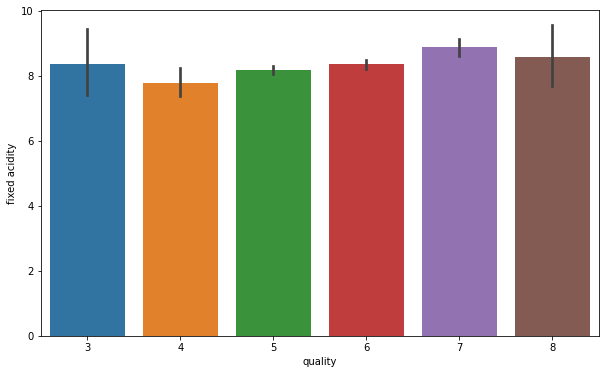

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data = wine_df)

From the barplot of qulaity vs acidity we can visualize that there is a decrease inquality  with the increase in acidity of the wine.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

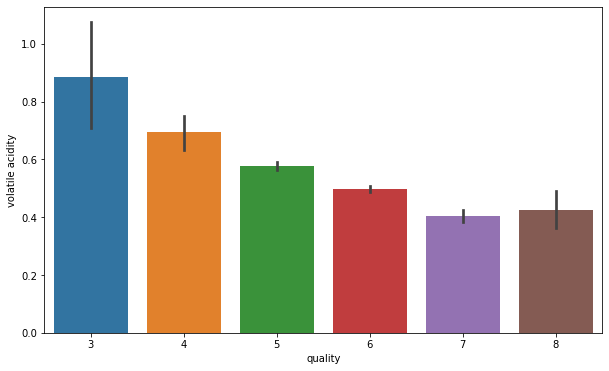

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data = wine_df)

there is a downing trend in the above barplot 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

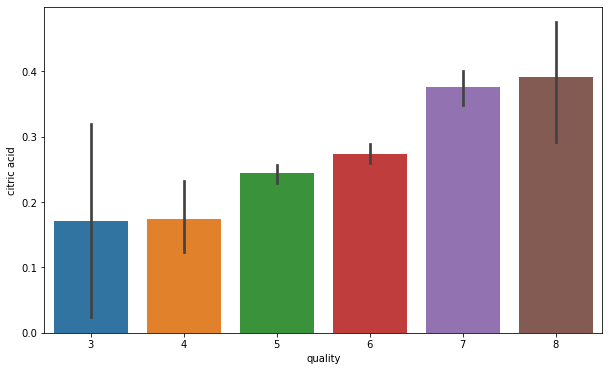

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data = wine_df)

There is a increase trend in the above plot in citric acid

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

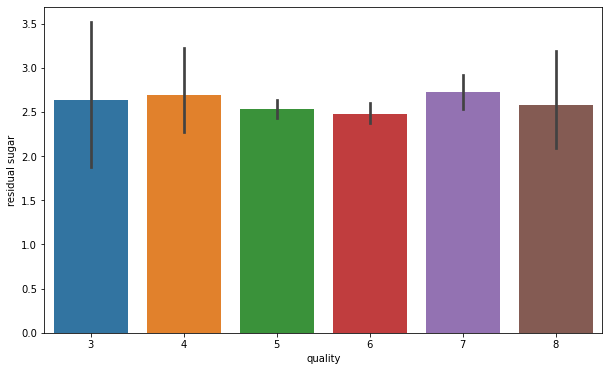

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

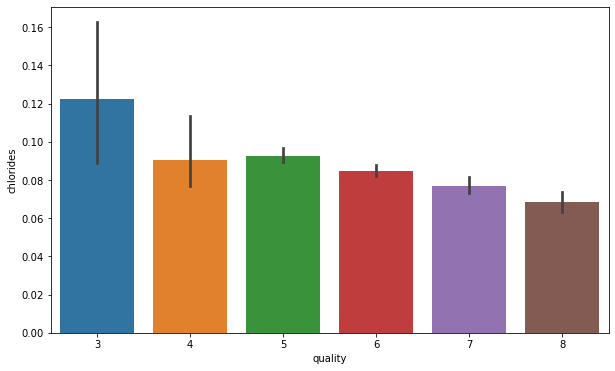

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', data = wine_df)

There is dowing trend in the above plot in chlorides

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

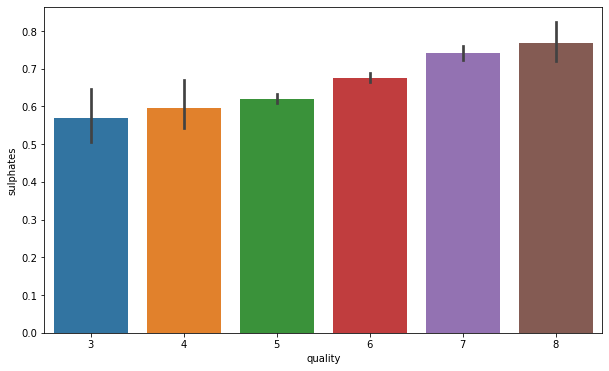

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data = wine_df)

There is an increase trend in above plot in sulphates

<AxesSubplot:xlabel='quality', ylabel='pH'>

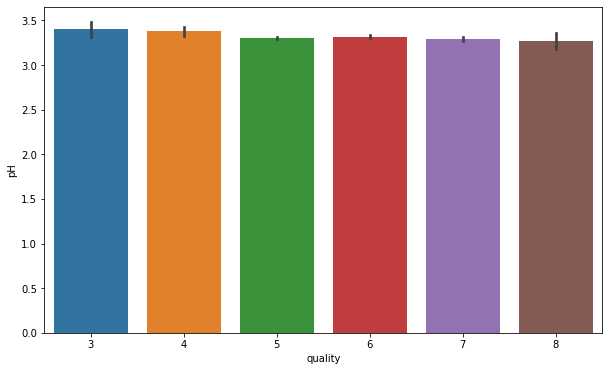

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='pH', data = wine_df)

From the barplot of qulaity vs ph we can visualize that there is a slight decrease in pH with the increase in quality of the wine.

Pre processing data for ML algorithm

In [25]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Rating for wine is between 3 to 8 and value above 6.5 consider as good wine quality rating and below 6.5 will be consider as bad wine

In [29]:
wine_df['quality']=wine_df['quality'].apply(lambda x: 1 if x > 6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

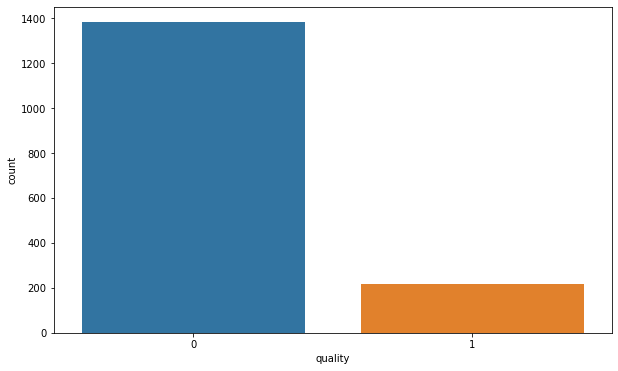

In [32]:
print (wine_df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

as we can see 1382 bad quality red wine 

In [33]:
X=wine_df.iloc[:,:-1].values
y=wine_df.iloc[:,:-1].values

In [35]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [36]:
y

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (1279, 11)
X_test Shape: (320, 11)
y_train Shape: (1279, 11)
y_test Shape: (320, 11)


In [42]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Heat mapping

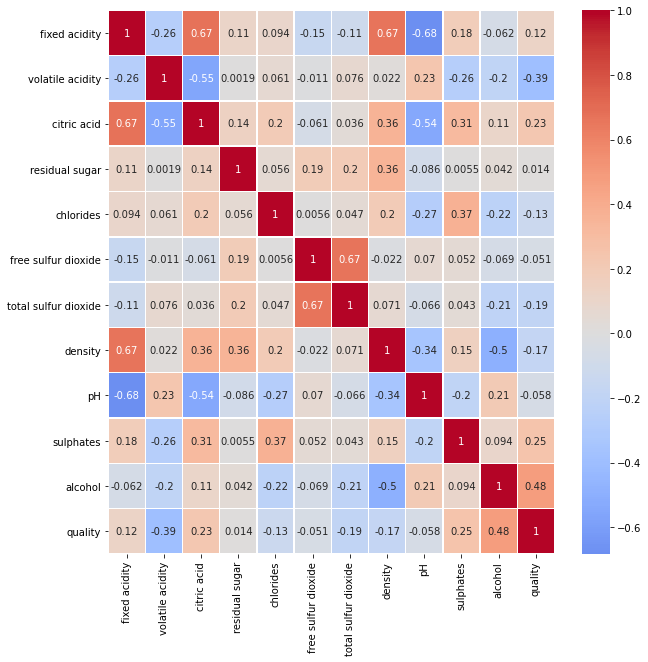

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

In [56]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

In the above frangment of code  and output, conclusion can be made that the attributes alcohol, sulphates, acid citric, acidity fixed have maximum corelation with quality attribute
Hence these four will be furthure for pattern and corelation exploration

fixed acidity vs wine quality

<function matplotlib.pyplot.show(close=None, block=None)>

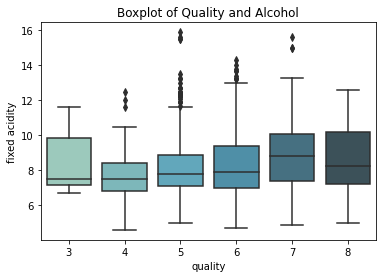

In [72]:
ax = sns.boxplot(x='quality',y='fixed acidity',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show

From the barplot of qulaity vs acidity we can visualize that there is a decrease inquality  with the increase in acidity of the wine.

volatile acidity vs wine quality


<function matplotlib.pyplot.show(close=None, block=None)>

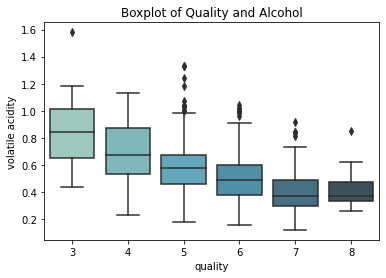

In [73]:

ax = sns.boxplot(x='quality',y='volatile acidity',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show

From the above boxplot we can see that the quality of wine increases with the decrease in the amount of volatile acids.

Citic acid Vs Wine Quality

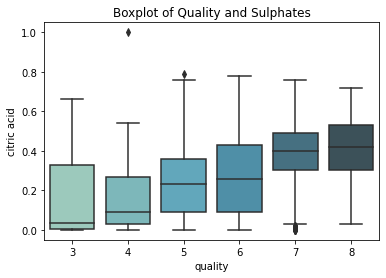

In [61]:
sns.boxplot(x="quality",y="citric acid",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

The above plot represents that the quality of alcohol increases with the increase in the amount of Citic acid in the wine.

free sulfur dioxide VS WINE QUALITY

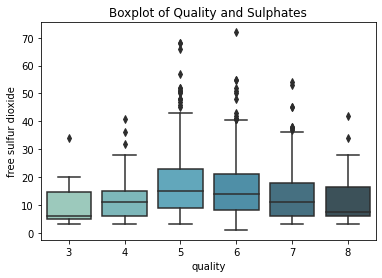

In [77]:
sns.boxplot(x="quality",y="free sulfur dioxide",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

total sulfur dioxide vs wine quailty

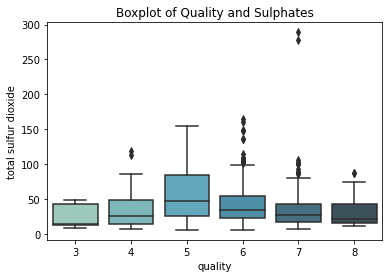

In [78]:
sns.boxplot(x="quality",y="total sulfur dioxide",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

density vs wine quality 

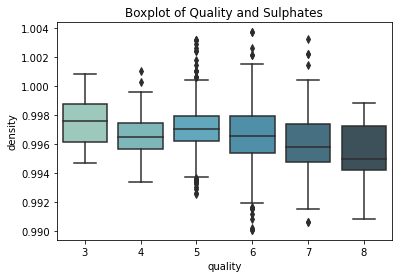

In [79]:
sns.boxplot(x="quality",y="density",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

Lower the density of wine better will be the quality of the wine. From the above boxplot we acn visualize that the quality of wine increases with decrease in density.

Sulphates vs Wine Quality

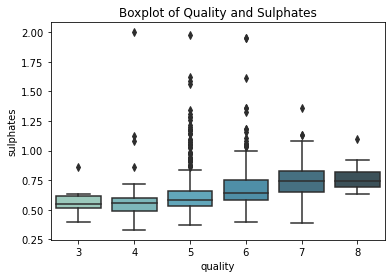

In [59]:
sns.boxplot(x="quality",y="sulphates",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

There is not much effect of the residual sugar on the quality of the wine.

The above plot represents that the quality of alcohol increases with the increase in the amount of sulphates in the wine.

Rediual Vs Wine QUALITY

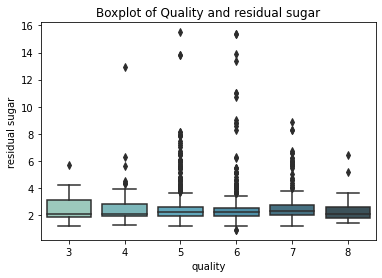

In [65]:
sns.boxplot(x="quality",y="residual sugar",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

There is not much effect of the residual sugar on the quality of the wine.

chlorides VS WINE QUALITY

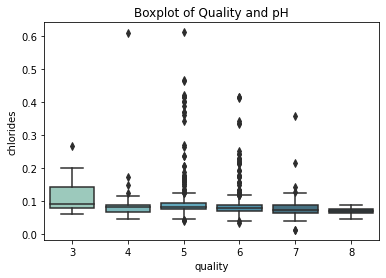

In [75]:
sns.boxplot(x='quality',y='chlorides',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

PH vs Wine Quality

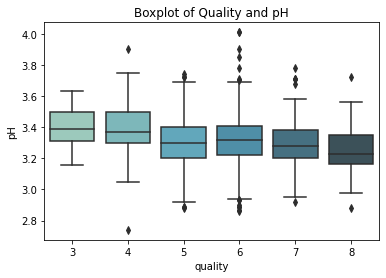

In [63]:
sns.boxplot(x='quality',y='pH',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

alcohol percent vs wine quality

<function matplotlib.pyplot.show(close=None, block=None)>

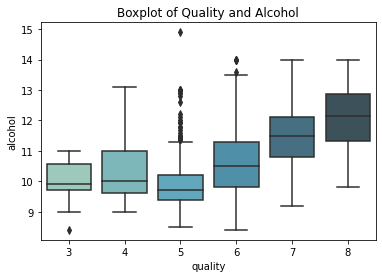

In [80]:

ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show

The above plot shows the increase in the quality of wine with the increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine better will be the quality.


From the above plot we can see that there is not even a slight change in the quality of wine for a particular amount of chlorides mixed in them.

Effect of acidity on the quality of wine

Citric Acid
Volatile Acidity
Fixed Acidity

The graphs show a linear regression between residual sugar and alcohol content for diffrent quality rating of red wine
An Observation can be made that in the superior and fine red winde type the residual sugar content remains alomost same irrespective of changes in alchohol content value on contast to which it can be observed that the residual sugar increase gradually when there is an increase in alchol content

This analysis can help in production of high percenr of good quality wine with continous monitoring and count role of alcohol and rediual sugar content in wine 

Modeling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = data.iloc[:,:11].values
Y = data.iloc[:,-1].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

cl = LogisticRegression()
cl.fit(X_train,Y_train)

cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)

[[  0   0   2   0   0   0]
 [  0   0   9   4   1   0]
 [  0   0 132  37   0   0]
 [  0   0  55  94  21   0]
 [  0   0   3  22  15   0]
 [  0   0   0   3   2   0]]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
#Applying SVM
from sklearn.svm import SVC
cl = SVC(kernel="rbf")
cl.fit(X_train,Y_train)

cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)

[[  0   0   1   1   0   0]
 [  0   0  11   3   0   0]
 [  0   0 126  42   1   0]
 [  0   0  50 114   6   0]
 [  0   0   2  24  14   0]
 [  0   0   0   2   3   0]]


Conclusion

The usahe of this analysis will be help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If we can control variables then we can predict the quality of wine and obtain more profits. Ploting graphs of relation between different variables is the basic step to determine the factor that have a larger impact and to work upon those factors. As seen the sklearn linear regression model along with random forest classifier. the random forest classifier performed marginally better and we decided to stick with it if we had to amke any more prediction